In [30]:
# Importing libaries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [31]:
# Load and Prepare the Dataset
path = "2.data"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
                "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
data = pd.read_csv(path, names=column_names)

In [32]:
# Data cleaning: Replace '?' with NaN and then drop or impute missing values
data = data.replace('?', np.nan)
data.dropna(inplace=True)

In [33]:
# Split the data into features and target variable
X = data.drop("target", axis=1)
y = data["target"]

In [34]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [35]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
# Model training
model = RandomForestClassifier(n_estimators=10000, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10000, random_state=0)

In [37]:
# Model evaluation
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))

[[29  1  0  0  0]
 [ 9  1  2  0  0]
 [ 4  0  1  2  0]
 [ 1  3  1  1  0]
 [ 2  1  1  1  0]]
              precision    recall  f1-score   support

           0       0.64      0.97      0.77        30
           1       0.17      0.08      0.11        12
           2       0.20      0.14      0.17         7
           3       0.25      0.17      0.20         6
           4       0.00      0.00      0.00         5

    accuracy                           0.53        60
   macro avg       0.25      0.27      0.25        60
weighted avg       0.40      0.53      0.45        60



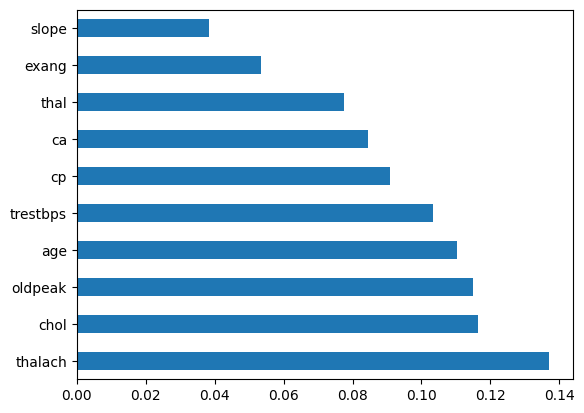

In [38]:
# Visualization of feature importances
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()